# Μηχανική Μάθηση - Εργασία 1 - Μέρος Α: Επιβλεπόμενη Μάθηση

Στόχος του πρώτου μέρους της ατομικής αυτής εργασίας είναι η εφαρμογή μεθόδων επιβλεπόμενης μάθησης για την ανάλυση ενός συνόλου δεδομένων του OpenML και συγκεκριμένα του συνόλου με ID 312, γνωστό και ως **Scene**. Το σύνολο από το οποίο προέκυψε βασίζεται σε πραγματικές εικόνες, από τις οποίες έχουν εξαχθεί ορισμένα χαρακτηριστικά, για χρήση μεθόδων πολλαπλής ταξινόμησης (multi label classification) σε 6 κατηγορίες. Το παρόν σύνολο αφορά μονάχα τη δυαδική ταξινόμηση σε μια κατηγορία (όπως διαβάζει κανείς καλώντας την `dataset.description` παρακάτω) και συγκεκριμένα το κατά πόσο κάθε εικόνα αντιστοιχεί σε αστικό σκηνικό (urban) ή όχι (not urban).

Πριν ξεκινήσουμε την επισκόπηση του συνόλου δεδομένων, θα κάνουμε `import` ορισμένες βασικές βιβλιοθήκες, απαραίτητες για κάθε σχεδόν πρόβλημα μηχανικής μάθησης ή ανάλυσης δεδομένων. Επιπλέον, θα ορίσουμε κάποια πράγματα απαραίτητα για το formatting της εργασίας (auxiliary functions).

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from matplotlib import colors

# Some custom colors
mycol = (0.13333, 0.35294, 0.38824)
mycomplcol = (0.6, 0.4549, 0.2078)

sns.set(style = "darkgrid") # for graphs style

# to present plt.show() graphs centered
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Επισκόπηση

Το πρώτο βήμα της επεξεργασίας αποτελεί η λήψη των δεδομένων, η οποία γίνεται μέσω του API του OpenML, όπως φαίνεται στα ακόλουθα βήματα.

In [3]:
# Import openml
import openml as oml

# The following variable contained the API key which is not made public for
# obvious reasons. Please use your own key if you want to run this notebook.
oml.config.apikey = '????'

In [4]:
# Read the dataset by ID
dataset = oml.datasets.get_dataset(312)

# Basic information about the dataset.
print(f"This is dataset {dataset.name}, the default target feature is {dataset.default_target_attribute}.")
print(f"URL: {dataset.url}")

# Uncomment the following to get details on the dataset.
# The "Description" paragraph explains that the current dataset is
# a binary classification problem considering just the 'Urban' label.

#print(dataset.description)

X, y, categorical_indicator, attribute_names = dataset.get_data(dataset_format="array", target=dataset.default_target_attribute)

This is dataset scene, the default target feature is Urban.
URL: https://www.openml.org/data/v1/download/1390080/scene.arff


Καθίσταται προφανές πως, εφόσον τα δεδομένα δεν ελήφθησαν «χειροκίνητα», δεν υπήρχε ζήτημα μετατροπών κάποιων plain text αρχείων. Παρακάτω, μέσω της βιβλιοθήκης `pandas` τα δεδομένα που ελήφθησαν μέσω του API φορτώνονται σε ένα pandas dataframe, προς περαιτέρω επεξεργασία. Η μεταβλητή `attribute_names` στην παραπάνω κλήση φροντίζει να θέσει την ονομασία (ετικέτες) των στηλών του dataframe, ενώ η μεταβλητή `categorical_indicator` υποδεικνύει ποιες από τις στήλες περιλαμβάνουν κατηγορικά χαρακτηριστικά και ποιες όχι. Τέλος, η δείκτρια μεταβλητή `y` αντιστοιχεί στην κατηγορία ταξινόμησης (η οποία είναι η Urban, αλλά στα παρακάτω τη μετονομάζουμε σε Class).

In [5]:
df = pd.DataFrame(X, columns=attribute_names)
df["Class"] = y # This corresponds to 'Urban'
# To get a glimpse of the constructed dataframe
df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Class
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1.0,0.0,0.0,0.0,1.0,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1.0,0.0,0.0,0.0,0.0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1.0,0.0,0.0,0.0,0.0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1.0,0.0,0.0,0.0,0.0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1.0,0.0,0.0,0.0,0.0,0


Γίνεται εμφανές πως οι επικεφαλίδες για τις στήλες υπάρχουν (θα μπορούσε, για παράδειγμα, το `attribute_names` να είναι κενό), αν και η πληροφορία ως προς το τι είναι το κάθε χαρακτηριστικό απουσιάζει (τα χαρακτηριστικά καλούνται απλώς με το πρόθεμα attr και έναν αύξοντα αριθμό). Για λόγους σύμβασης, θα μετατρέψουμε τις τιμές των στηλών με τίτλο `Beach`, `Sunset`, `FallFoliage`, `Field` και `Mountain` σε ακεραίους (0,1).

In [6]:
df = df.astype({"Beach": int, "Sunset": int, "FallFoliage": int, "Field": int, "Mountain": int})

Ας δούμε τώρα μέσω των επόμενων εκτυπώσεων κάποια άλλα βασικά χαρακτηριστικά του συνόλου που επεξεργαζόμαστε.

In [7]:
print(f"▶ The dataframe includes {df.shape[1]} column(s) and {df.shape[0]} row(s).")
print(f"▶ The first {len(attribute_names)} columns correspond to feature values, while the last column corresponds to the class label.")
print(f"▶ Of the {len(attribute_names)} features, {(np.asarray(categorical_indicator)==False).sum()} correspond to numeric values, while {(np.asarray(categorical_indicator)==True).sum()} correspond to categorical values.")
print(f"▶ There is a total of {df.isnull().values.sum()} missing value(s) from the dataset.")

▶ The dataframe includes 300 column(s) and 2407 row(s).
▶ The first 299 columns correspond to feature values, while the last column corresponds to the class label.
▶ Of the 299 features, 294 correspond to numeric values, while 5 correspond to categorical values.
▶ There is a total of 0 missing value(s) from the dataset.


Σε κάθε περίπτωση, είναι ευχάριστο το γεγονός πως δεν υπάρχουν απουσιάζουσες τιμές στο σύνολο δεδομένων. Στο σημείο αυτό, όμως, εγείρεται ένα σημαντικό ερώτημα: παρότι δεν υπάρχουν μη διατεταγμένα δεδομένα, αφού τα 6 κατηγορικά χαρακτηριστικά έχουν χωριστεί σε 6 διαφορετικές στήλες, καθεμιά εκ των οποίων λαμβάνει την τιμή 0 ή 1, τα 5 από τα 6 κατηγορικά χαρακτηριστικά δεν έχουν κατασκευαστεί ώστε να αποτελούν χαρακτηριστικά προς ταξινόμηση των δεδομένων σε urban/not urban. Αντιθέτως, το σύνολο δεδομένων κατασκευάστηκε αρχικά για να αποτελέσει ένα σύνολο για χρήση πολλαπλής ταξινόμησης. Είναι, λοιπόν, σωστό τα labels των υπόλοιπων κατηγοριών να χρησιμοποιηθούν εδώ ως χαρακτηριστικά για τον προσδιορισμό ενός άλλου label; Η απάντηση από μεριάς μας είναι αρνητική από εννοιολογική πλευρά. Ως εκ τούτου, παρακάτω θα αφαιρέσουμε τις στήλες που αφορούν τις 5 κατηγορίες οι οποίες δεν αξιοποιούνται σε αυτό το πρόβλημα.

Ολοκληρώνοντας την επισκόπηση του συνόλου δεδομένων, αξίζει να μελετηθεί το κατά πόσο το σύνολο δεδομένων είναι ισορροπημένο ή όχι. Επιλέγουμε, για λόγους πληρότητας, να πραγματοποιήσουμε τη μελέτη αυτή σε δύο άξονες: αφενός, να εξετάσουμε κατά πόσο το σύνολο **αυτό καθ' αυτό** είναι ισορροπημένο, δηλαδή να μελετήσουμε κατά πόσο οι σχετικές συχνότητες των 6 αρχικών κατηγοριών  είναι παρόμοιες ή όχι. Από την άλλη, να εξετάσουμε μόνο τη συχνότητα της δείκτριας κατηγορίας που καλούμαστε να μελετήσουμε παρακάτω και άρα κατά πόσο το σύνολο δεδομένων είναι ισορροπημένο **υπό συνθήκη**, δηλαδή για τη χρήση που επιθυμούμε να κάνουμε.

### Έλεγχος ισορροπίας για το σύνολο αυτό καθ' αυτό

In [8]:
class_num = {}
for i in range(6):
    # Calculate the instances of each of the original 6 classes
    class_num[i] = (df.iloc[:,(np.asarray(categorical_indicator)==False).sum()+i]==1).sum()

Ενδιαφέρον παρουσιάζει το γεγονός πως οι 6 αρχικές κατηγορίες δεν ορίζουν ένα πρόβλημα πολλαπλής ταξινόμησης υπό τη συνηθισμένη έννοια του όρου. Αυτό γίνεται εύκολα αντιληπτό, εάν κανείς συγκρίνει τους ακόλουθους αριθμούς:

In [9]:
print(f"The total number of data is {df.shape[0]}.")
print(f"The total number of class labels equal to 1 (i.e. truth of label) is {sum(class_num.values())}.")

The total number of data is 2407.
The total number of class labels equal to 1 (i.e. truth of label) is 2585.


Το γεγονός αυτό υποδεικνύει πως υπάρχουν δεδομένα τα οποία ταξινομούνται σε περισσότερες από μία κατηγορίες. Ενδέχεται αυτός να είναι και ο λόγος για τον οποίο στην επεξήγηση του συνόλου δεδομένων αυτό περιγράφεται ως ένα binary classification problem dataset με δείκτρια κατηγορία την Urban. Το πλήθος των δεδομένων τα οποία ταξινομούνται σε περισσότερες από μία κατηγορίες είναι **το πολύ**:

In [10]:
print(f"The maximum number of data classified in more than one classes are {sum(class_num.values())-df.shape[0]}.")

The maximum number of data classified in more than one classes are 178.


Δεδομένου πως αυτός ο αριθμός αποτελεί περίπου το 7% των δεδομένων, θα ακολουθήσουμε τις γνωστές συμβάσεις προκειμένου να αποφανθούμε εάν το αρχικό σύνολο δεδομένων είναι ισορροπημένο ή όχι. Παρ' όλα αυτά, λαμβάνουμε πάντοτε υπ' όψιν πως υπάρχουν ορισμένα περιθώρια σφάλματος στα επόμενα συμπεράσματα.

In [11]:
for i in range(6):
    print(f"The frequency of class No. {i+1} in the original data is {100*class_num[i]/df.shape[0]:.2f}%.")

The frequency of class No. 1 in the original data is 17.74%.
The frequency of class No. 2 in the original data is 15.12%.
The frequency of class No. 3 in the original data is 16.49%.
The frequency of class No. 4 in the original data is 17.99%.
The frequency of class No. 5 in the original data is 22.14%.
The frequency of class No. 6 in the original data is 17.91%.


Σημειώνεται πως, αφού υπάρχουν δεδομένα τα οποία κατατάσσονται σε περισσότερες από μία κατηγορίες, είναι αναμενόμενο τα παραπάνω ποσοστά να μην αθροίζουν στο 100%. Συγκεκριμένα, το άθροισμά τους είναι περίπου 107%, δηλαδή ακριβώς τόσες ποσοστιαίες μονάδες πάνω από το 100%, όσες και το ποσοστό του μέγιστου αριθμού δεδομένων τα οποία κατατάσσονται σε περισσότερες από μία κατηγορίες.

Γίνεται εμφανές πως η κατηγορία υπ' αριθμόν 5 (Mountain) είναι η συχνότερη, με σχετική συχνότητα εμφάνισης 22.14%, ενώ η λιγότερο συχνή κατηγορία είναι η υπ' αριθμόν 2 (Sunset) με σχετική συχνότητα εμφάνισης 15.12%. Εφόσον ο λόγος των σχετικών τους συχνοτήτων ισούται περίπου με 1.46, το οποίο είναι μικρότερο από το συμβατικό κατώφλι του 1.5, μπορεί κανείς να συμπεράνει πως το αρχικό σύνολο δεδομένων αυτό καθ' αυτό είναι *οριακά* ισορροπημένο.

### Έλεγχος ισορροπίας για το σύνολο υπό συνθήκη

Η προηγούμενη ανάλυση μάλλον κατέστησε ήδη προφανές πως το σύνολο σε ό,τι αφορά την κατηγορία υπ' αριθμόν 6 (Urban) δεν είναι ισορροπημένο. Για του λόγου το αληθές:

In [12]:
print(f"The instances where class Urban is true is {(df['Class'] == 1).sum()} out of {df.shape[0]} total instances.")
print(f"This indicates that its relevant frequency is about {100*(df['Class'] == 1).sum()/df.shape[0]:.2f}%.")

The instances where class Urban is true is 431 out of 2407 total instances.
This indicates that its relevant frequency is about 17.91%.


Έτσι, εξετάζοντας το συγκεκριμένο σύνολο δεδομένων ως ένα binary dataset, είναι εξόφθαλμο πως αυτό είναι σημαντικά μη ισορροπημένο, ξεπερνώντας κατά πολύ το συμβατικό κατώφλι του 60%-40% (συγκεκριμένα, εδώ έχουμε ποσοστά 82.09% - 17.91%). Αυτό σημαίνει πως εάν θέλουμε μια αποδοτική εκπαίδευση μοντέλων ταξινόμησης επάνω στο συγκεκριμένο σύνολο δεδομένων θα πρέπει να ληφθούν μέτρα για την τεχνητή εξισορρόπησή του.

## Προετοιμασία - Προεπεξεργασία

Η προετοιμασία των δεδομένων προκειμένου αυτά να αξιοποιηθούν για την εκπαίδευση ταξινομητών θα πραγματοποιηθεί για δύο περιπτώσεις: στη μία, τα διαθέσιμα δεδομένα θα χωριστούν απλώς σε δεδομένα εκπαίδευσης και δεδομένα αξιολόγησης, χωρίς περαιτέρω επεξεργασία. Στην άλλη περίπτωση, θα πραγματοποιηθεί μια προεπεξεργασία προκειμένου να αποκτήσουμε μια εικόνα του πόσο η προεπεξεργασία επηρεάζει τα τελικά αποτελέσματα των ταξινομητών που θα μελετηθούν, χωρίς όμως να προχωρήσουμε σε πλήρη βελτιστοποίηση (αυτό θα γίνει στο τέλος, επομένως η παρούσα προεπεξεργασία θα γίνει ως ένα ενδιάμεσο βήμα μεταξύ της out-of-the-box και της τελικής επίδοσης). Σε καθεμία εκ των περιπτώσεων αυτών, το πρώτο βήμα θα είναι η απόρριψη των στηλών που αφορούν τις κατηγορικές μεταβλητές πέραν της Urban, για τους λόγους που εξηγήθηκαν στην προηγούμενη ενότητα.

In [13]:
df.drop(['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain'], axis=1, inplace=True)
df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr286,attr287,attr288,attr289,attr290,attr291,attr292,attr293,attr294,Class
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.049615,0.068962,0.653879,0.354982,0.124074,0.157332,0.247298,0.014025,0.029709,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.160008,0.414088,0.361843,0.303399,0.176387,0.251454,0.137833,0.082672,0.036320,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.038082,0.079977,0.004901,0.003460,0.006049,0.017166,0.051125,0.112506,0.083924,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.016922,0.024174,0.036799,0.007694,0.009735,0.019267,0.031290,0.049780,0.090959,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.023177,0.129994,0.167709,0.226580,0.218534,0.198151,0.238796,0.164270,0.184290,0


Στη συνέχεια, προχωρούμε στο διαχωρισμό των δεδομένων σε δεδομένα εκπαίδευσης και δεδομένα αξιολόγησης σε ποσοστό 30%. Ακολουθούμε τη μέθοδο `stratified split`, μέσω της οποίας επιτυγχάνουμε η αναλογία δεδομένων εκπαίδευσης και δεδομένων αξιολόγησης να είναι σταθερή στα δύο σύνολα δεδομένων. Η `random_state` επιλέγεται καθαρά για λόγους debugging, καθώς και προκειμένου τα αποτελέσματα που θα παρουσιαστούν να είναι αναπαράξιμα και σε μελλοντικές εκτελέσεις του notebook.

In [14]:
# import the sklearn function that performs the splitting
from sklearn.model_selection import train_test_split

# Keep only the features into a numpy array
X_train = np.asarray(df.drop(['Class'], axis=1))

X_train_unmod, X_test_unmod, y_train, y_test = train_test_split(X_train, y, test_size=0.3, random_state=24, stratify=y)

Τα παραπάνω numpy arrays για τα χαρακτηριστικά φέρουν τον επιπλέον δείκτη `unmod`, καθώς συνιστούν τα σύνολα εκπαίδευσης και αξιολόγησης που θα αξιοποιηθούν για την out-of-the-box εκπαίδευση και αξιολόγηση των ταξινομητών.

---

Σε όσα ακολουθούν στην παρούσα ενότητα, θα γίνει αναφορά σε ορισμένες τεχνικές προεπεξεργασίας τις οποίες θα χρησιμοποιήσουμε πριν προχωρήσουμε στην τελική βελτιστοποίηση του εκάστοτε μοντέλου για να αποκτήσουμε μια εικόνα της επιρροής που αυτές έχουν στην επίδοση των ταξινομητών. Ο λόγος για τον οποίο επιλέγουμε να εισαγάγουμε το ενδιάμεσο αυτό βήμα είναι πως κατά την αναζήτηση πλέγματος μας δίνεται η δυνατότητα να ρυθμίσουμε διάφορες υπερπαραμέτρους, όμως όχι το αν θα εφαρμοστούν ή όχι κάποια σημεία ενός pipeline που ορίζει την προεπεξεργασία των δεδομένων. Για παράδειγμα, το αν θα πρέπει τα δεδομένα να υποστούν κανονικοποίηση μέσω ενός StandardScaler, μέσω ενός MinMaxScaler ή να μην υποστούν καν κανονικοποίηση, είναι κάτι το οποίο η συνήθης αναζήτηση πλέγματος δε μπορεί να διερευνήσει. Φυσικά, θα πραγματοποιήσουμε τη διερεύνηση αυτή χρησιμοποιώντας διασταυρούμενη επικύρωση στο σύνολο των δεδομένων εκπαίδευσης, χωρίς να επέμβουμε με οποιοδήποτε τρόπο στο σύνολο αξιολόγησης, αφού σε ρεαλιστικές συνθήκες δεν υπάρχει πρόσβαση σε αυτό μέχρι και το deployment του εκάστοτε μοντέλου.

Αρχικά, θα πραγματοποιήσουμε αξιολόγηση μέσω δεκαπλής διασταυρούμενης επικύρωσης σε κάθε ταξινομητή για τις default τιμές του χρησιμοποιώντας τα `unmod` δεδομένα, ώστε να υπάρχει ένα σημείο αναφοράς με βάση το οποίο θα έχουμε τη δυνατότητα να αξιολογούμε την επιρροή κάθε διαδικασίας προεπεξεργασίας.

In [15]:
# import the required classifier libraries
from sklearn.naive_bayes import GaussianNB # for gaussian naive bayes
from sklearn import neighbors # for kNN
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn.neural_network import MLPClassifier # for perceptron
from sklearn.svm import SVC # for SVC

# import the cross validation model
from sklearn.model_selection import cross_val_score

# to ignore convergence warnings for the MLP classifier
import warnings 
warnings.filterwarnings('ignore')

In [16]:
# define a function to do the cross-validation and the diagnostics report
# so that we don't have to repeat the following lines of code many times.
def InitCrossVal(X,y):
    
    CLFs = {1 : GaussianNB(), 2 : neighbors.KNeighborsClassifier(), 3 : LogisticRegression(), 4 : MLPClassifier(), 5 : SVC()}

    for i in range(1,6): # 5 classifiers
        clf = CLFs[i]
        scores = cross_val_score(clf, X, y, cv=10)
        print(101*"-")
        print(f"The mean CV-score achieved by {str(CLFs[i]).replace('()','')} is {100*scores.mean():.2f}% with a standard deviation of {100*scores.std():.2f}%.")

    return

InitCrossVal(X_train_unmod,y_train)

-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by GaussianNB is 68.52% with a standard deviation of 2.91%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by KNeighborsClassifier is 86.34% with a standard deviation of 2.55%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by LogisticRegression is 86.64% with a standard deviation of 2.90%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by MLPClassifier is 88.66% with a standard deviation of 1.74%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by SVC is 89.37% with a standard deviation of 1.70%.


Τα πρωταρχικά αυτά αποτελέσματα υποδεικνύουν το λόγο για τον οποίο το ενδιάμεσο αυτό βήμα κρίθηκε απαραίτητο. Όπως γίνεται εμφανές, με εξαίρεση τον Gaussian Naive Bayes, όλοι οι ταξινομητές πετυχαίνουν CV-score υψηλότερο του 85%. Ενδέχεται, λοιπόν, τα δεδομένα που χρησιμοποιούμε να έχουν ήδη υποστεί κάποια προεπεξεργασία, ή τα χαρακτηριστικά να είχαν επιλεγεί με πολύ προσεκτικούς ελέγχους. Αυτό σημαίνει πως, σε αντίθεση με τη συνήθη περίπτωση, η περαιτέρω προεπεξεργασία τους πριν την τελική βελτιστοποίηση των ταξινομητών μπορεί να οδηγήσει σε χαμηλότερες επιδόσεις. Παρακάτω παραθέτουμε έναν πίνακα με τα αποτελέσματα της αξιολόγησης μέσω CV των πέντε αυτών ταξινομητών.

| | Gaussian NB | kNN | Log. Reg. | MLP | SVC |
| :-: | :-: | :-: | :-: | :-: | :-: |
| **CV-Score (%)** | 68.52 $\pm$ 2.91 | 86.34 $\pm$ 2.55 | 86.64 $\pm$ 2.90 | 88.42 $\pm$ 1.70 | 89.37 $\pm$ 1.70 |

### Μείωση Διαστατικότητας

Θα ξεκινήσουμε τη διερεύνηση του κατά πόσο η προεπεξεργασία κρίνεται απαραίτητη σε ό,τι αφορά τη μείωση της διαστατικότητας του προβλήματος. Παρατηρούμε ξανά πως κάθε δεδομένο περιλαμβάνει 294 χαρακτηριστικά, έναν αριθμό σχετικά υψηλό σε σχέση με το συνολικό πλήθος των δεδομένων. Η εφαρμογή της μεθόδου PCA είναι πάντοτε μια καλή επιλογή για τη μείωση της διαστατικότητας του προβλήματος, όμως καλό είναι να επιλέγεται μόνο σε περιπτώσεις όπου η μείωση αυτή καθίσταται απόλυτα απραίτητη, κάτι το οποίο μένει να φανεί αφότου έχουμε μια πρώτη εικόνα από την εκπαίδευση των ταξινομητών. Έτσι, αντί για την PCA, θα πραγματοποιήσουμε αρχικά έναν έλεγχο στα δεδομένα εκπαίδευσης, προκειμένου να δούμε εάν υπάρχουν χαρακτηριστικά πολύ χαμηλής διακύμανσης, τα οποία λόγω αυτού δεν ενισχύουν σημαντικά τη διακριτική ικανότητα του εκάστοτε ταξινομητή. Ο έλεγχος αυτός θα γίνει μέσω της μεθόδου `VarianceThreshold` της `sklearn`, η οποία έχει ως default κατώφλι το μηδέν, δηλαδή πετάει στήλες που αντιστοιχούν σε χαρακτηριστικά μηδενικής διακύμανσης.

In [17]:
print(f"The minimum feature variance is {X_train_unmod.var(axis=0).min():.3f}, while the maximum feature variance is {X_train_unmod.var(axis=0).max():.3f}.")

The minimum feature variance is 0.005, while the maximum feature variance is 0.066.


Μιας και στο σύνολο δεδομένων δεν υπάρχουν χαρακτηριστικά με μηδενική διακύμανση, η εφαρμογή της `VarianceThreshold` με το default κατώφλι της δε θα επιφέρει κάποιο αποτέλεσμα. Θα εξετάσουμε, επομένως, τι θα συμβεί εάν αφαιρέσουμε από το σύνολο τα χαρακτηριστικά με διακύμανση μικρότερη από μια μη μηδενική τιμή.

In [18]:
# import the method
from sklearn.feature_selection import VarianceThreshold

# setup the selector
selector = VarianceThreshold(threshold=0.01)
X_train_reduced = selector.fit_transform(X_train_unmod)
mask = selector.get_support()

print(f"The selector has dropped {(mask==False).sum()} feature(s).")

The selector has dropped 23 feature(s).


Παρατηρούμε πως υπάρχουν 19 χαρακτηριστικά με μέση διακύμανση μικρότερη του 0.01, τα οποία απορρίπτονται από το σύνολο δεδομένων. Εάν επαναλάβουμε τη διαδικασία CV, παίρνουμε τα ακόλουθα:

In [19]:
InitCrossVal(X_train_reduced,y_train)

-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by GaussianNB is 69.59% with a standard deviation of 2.51%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by KNeighborsClassifier is 85.98% with a standard deviation of 2.59%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by LogisticRegression is 86.70% with a standard deviation of 2.62%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by MLPClassifier is 88.06% with a standard deviation of 2.27%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by SVC is 89.31% with a standard deviation of 1.63%.


Βλέπουμε πως η αφαίρεση χαρακτηριστικών δεν επηρεάζει σημαντικά την επίδοση των περισσότερων ταξινομητών. Σε κάθε περίπτωση, στην τελική βελτιστοποίηση το κατώφλι της `VarianceThreshold` μπορεί να αναπροσαρμοστεί και να ελεγχθεί ποια τιμή του οδηγεί στα βέλτιστα αποτελέσματα. Παραθέτουμε παρακάτω τον προηγούμενο πίνακα, όπου έχουν προστεθεί τα αποτελέσματα κατόπιν εφαρμογής της διαστατικής μείωσης. Με πράσινο ή κόκκινο χρώμα έχουν σημειωθεί τα νέα αποτελέσματα για τους ταξινομητές των οποίων η επίδοση αυξήθηκε ή μειώθηκε, αντίστοιχα, σε σχέση με την αρχική τους αξιολόγηση.

| | Gaussian NB | kNN | Log. Reg. | MLP | SVC |
| :-: | :-: | :-: | :-: | :-: | :-: |
| **CV-Score - initial (%)** | 68.52 $\pm$ 2.91 | 86.34 $\pm$ 2.55 | 86.64 $\pm$ 2.90 | 88.42 $\pm$ 1.70 | 89.37 $\pm$ 1.70 |
| **CV-Score - after reduction (%)** | <font color='green'>69.59</font> $\pm$ 2.51 | <font color='red'>85.98</font> $\pm$ 2.59 | <font color='green'>86.70</font> $\pm$ 2.62 | <font color='red'>87.83</font> $\pm$ 1.49 | <font color='red'>89.31</font> $\pm$ 1.63 |

### Κανονικοποίηση

Ένα επόμενο λογικό βήμα αποτελεί η κανονικοποίηση των δεδομένων, μια διαδικασία απαραίτητη σε πολλούς ταξινομητές. Για το σκοπό αυτό, θα αξιοποιηθούν οι `StandardScaler` και `MinMaxScaler` της `sklearn`.

In [20]:
# both scalers are included here
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler().fit(X_train_unmod)
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train_unmod)

X_train_std = std_scaler.transform(X_train_unmod)
X_train_minmax = minmax_scaler.transform(X_train_unmod)

print("Initiating CV procedure for StandardScaler():")
InitCrossVal(X_train_std,y_train)
print("\n"+101*"*"+"\n")
print("Initiating CV procedure for MinMaxScaler():")
InitCrossVal(X_train_minmax,y_train)

Initiating CV procedure for StandardScaler():
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by GaussianNB is 68.52% with a standard deviation of 2.91%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by KNeighborsClassifier is 85.98% with a standard deviation of 3.09%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by LogisticRegression is 85.21% with a standard deviation of 2.79%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by MLPClassifier is 89.01% with a standard deviation of 1.54%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by SVC is 90.38% with a standard deviation of 1.

Σε ό,τι αφορά τον `MinMaxScaler`, παρατηρούμε πως στους μόνους ταξινομητές όπου σημειώνεται διαφορά στην επίδοση, αυτή είναι προς το χειρότερο. Από την άλλη, ο `StandardScaler` οδηγεί σε βελτιώσεις σε δύο από τους τέσσερεις ταξινομητές, η οποία όμως δεν είναι υψηλή (είναι της τάξης του 1%). Βάσει αυτών των αποτελεσμάτων, συμπεραίνουμε πως η χρήση του `StandardScaler` ενδείκνυται, όμως όχι στην περίπτωση της λογιστικής παλινδρόμησης και του kNN. Παραθέτουμε, ξανά, τον πίνακα που απεικονίζει τα αρχικά CV-scores, καθώς και τα αντίστοιχα κατόπιν κάθε είδους κανονικοποίησης.

| | Gaussian NB | kNN | Log. Reg. | MLP | SVC |
| :-: | :-: | :-: | :-: | :-: | :-: |
| **CV-Score - initial (%)** | 68.52 $\pm$ 2.91 | 86.34 $\pm$ 2.55 | 86.64 $\pm$ 2.90 | 88.42 $\pm$ 1.70 | 89.37 $\pm$ 1.70 |
| **CV-Score - StandardScaler (%)** | 68.52 $\pm$ 2.91 | <font color='red'>85.98</font> $\pm$ 3.09 | <font color='red'>85.21</font> $\pm$ 2.79 | <font color='green'>89.07</font> $\pm$ 1.35 | <font color='green'>90.38</font> $\pm$ 1.85 |
| **CV-Score - MinMaxScaler (%)** | 68.52 $\pm$ 2.91 | <font color='red'>86.16</font> $\pm$ 2.43 | 86.64 $\pm$ 2.90 | <font color='red'>88.24</font> $\pm$ 1.70 | 89.37 $\pm$ 1.80 |

### Εξισορρόπηση

Το τελευταίο σημαντικό βήμα της προεπεξεργασίας των δεδομένων είναι η αντιμετώπιση του προβλήματος εξισορρόπησης του συνόλου δεδομένων, το οποίο εμφανίζει σημαντική ανομοιογένεια ως προς τα δεδομένα που ανήκουν στη δείκτρια κατηγορία σε σχέση με αυτά που δεν ανήκουν. Μάλιστα, τα αντίστοιχα ποσοστά αναμένεται να είναι αυτά που υπολογίστηκαν στην προηγούμενη ενότητα, αφού ο διαχωρισμός των δεδομένων σε δεδομένα εκπαίδευσης και δεδομένα αξιολόγησης έγινε μέσω stratified split. Πράγματι:

In [21]:
print(f"The relative frequency of 'Urban' data is {100*((y_train==1).sum()/len(y_train)):.1f}%, which means that the relative frequency of non-'Urban' data is {100*(1-((y_train==1).sum()/len(y_train))):.1f}%.")

The relative frequency of 'Urban' data is 17.9%, which means that the relative frequency of non-'Urban' data is 82.1%.


Υπάρχουν δύο τρόποι για την εξισορρόπηση ενός συνόλου δεδομένων: οι μέθοδοι under- και over-sampling, όπου για την εκπαίδευση ενός ταξινομητή αξιοποιούνται λιγότερα δεδομένα που ανήκουν στην πολυπληθέστερη κατηγορία ή περισσότερα δεδομένα της κατηγορίας με τη μικρότερη συχνότητα εμφάνισης, αντίστοιχα. Κατά σύμβαση, ένα σύνολο δεδομένων που αντιστοιχεί σε πρόβλημα δυαδικής ταξινόμησης θεωρείται ισορροπημένο όταν η αναλογία των δεδομένων που ανήκουν στη δείκτρια κατηγορία σε σχέση με τα δεδομένα που δεν ανήκουν σ' αυτήν δεν έχει εύρος μεγαλύτερο του 20\% (δηλαδή τα δεδομένα είναι το πολύ 60%-40%). Φυσικά, καθεμιά έχει τα μειονεκτήματά της, με το undersampling να πετάει δεδομένα από το σύνολο δεδομένων, τη στιγμή που θα έπρεπε όλα να αξιοποιούνται στο μέγιστο και το undersampling να δημιουργεί ψεύτικα δεδομένα ή να επαναλαμβάνει ήδη υπάρχοντα.

Η βιβλιοθήκη `imblearn` προσφέρει διάφορες επιλογές under- και over-sampling, παρ' όλα αυτά για αρχή θα χρησιμοποιήσουμε μονάχα τους αντίστοιχους random samplers. Για την εξισορρόπηση του συνόλου δεδομένων εκπαίδευσης θα αξιοποιηθούν οι `RandomUnderSampler` και `RandomOverSampler`.

Αρχικά, θα επιχειρηθεί η εξισορρόπηση του συνόλου χρησιμοποιώντας μονάχα την `RandomUnderSampler` και κατόπιν θα επιχειρηθεί το ίδιο χρησιμοποιώντας μονάχα την `RandomOverSampler`. Τέλος, θα δοκιμάσουμε έναν συνδυασμό τους, ώστε να μη δίνεται έμφαση μόνο στο under- ή μόνο στο over-sampling, ελπίζοντας για ένα πιο ισορροπημένο αποτέλεσμα. Συγκεκριμένα, κάθε μέθοδος θα κληθεί με τρόπο τέτοιο, ώστε να προσθέτει ή να αφαιρεί τον ίδιο αριθμό δεδομένων στο σύνολο, προκειμένου η τελική αναλογία να φτάσει στο 50%-50%. Το σύνολο $x$ των δεδομένων που πρέπει να προστεθούν και να αφαιρεθούν προκύπτει απλώς ως η λύση της εξίσωσης

$$ \frac{N_U+x}{N_{NU}-x} = 1, $$

όπου $N_U$ και $N_{NU}$ είναι το αρχικό πλήθος των δεδομένων Urban και non-Urban, αντίστοιχα. Η λύση ισούται φυσικά με

$$ x = \frac{N_{NU} - N_{U}}{2}. $$

In [22]:
# import the oversampler
from imblearn.over_sampling import RandomOverSampler
# import the undersampler
from imblearn.under_sampling import RandomUnderSampler

# Strictly over sampling
ros = RandomOverSampler(random_state=24)
X_train_OS, y_train_OS = ros.fit_resample(X_train_unmod,y_train)

# Strictly under sampling
rus = RandomUnderSampler(random_state=24)
X_train_US, y_train_US = rus.fit_resample(X_train_unmod,y_train)

# Mixed method
num_urban = (y_train==1).sum() # N_U
num_non_urban = (y_train==0).sum() #N_NU

n_samp = 0.5*(num_non_urban - num_urban) # equal to x

# Begin by oversampling the minority
ros = RandomOverSampler(sampling_strategy=(num_urban+n_samp)/(num_non_urban),random_state=24)
X_train_MIX, y_train_MIX = ros.fit_resample(X_train_unmod,y_train)

# Finish by undersampling the majority
rus = RandomUnderSampler(sampling_strategy=(num_urban+n_samp)/(num_non_urban-n_samp),random_state=24)
X_train_MIX, y_train_MIX = rus.fit_resample(X_train_MIX,y_train_MIX)

print(f"As a sanity check:")
print(f"Strictly OS: The new relative frequencies are {100*((y_train_OS==1).sum()/len(y_train_OS)):.2f}% for urban data and {100*((y_train_OS==0).sum()/len(y_train_OS)):.2f}% for non-urban data.")
print(f"Strictly US: The new relative frequencies are {100*((y_train_US==1).sum()/len(y_train_US)):.2f}% for urban data and {100*((y_train_US==0).sum()/len(y_train_US)):.2f}% for non-urban data.")
print(f"Mixed method: The new relative frequencies are {100*((y_train_MIX==1).sum()/len(y_train_MIX)):.2f}% for urban data and {100*((y_train_MIX==0).sum()/len(y_train_MIX)):.2f}% for non-urban data.")

As a sanity check:
Strictly OS: The new relative frequencies are 50.00% for urban data and 50.00% for non-urban data.
Strictly US: The new relative frequencies are 50.00% for urban data and 50.00% for non-urban data.
Mixed method: The new relative frequencies are 50.00% for urban data and 50.00% for non-urban data.


In [23]:
print("Initiating CV procedure for Strictly OS:")
InitCrossVal(X_train_OS,y_train_OS)
print("\n"+101*"*"+"\n")
print("Initiating CV procedure for Strictly US:")
InitCrossVal(X_train_US,y_train_US)
print("\n"+101*"*"+"\n")
print("Initiating CV procedure for Mixed method:")
InitCrossVal(X_train_MIX,y_train_MIX)

Initiating CV procedure for Strictly OS:
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by GaussianNB is 76.66% with a standard deviation of 1.92%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by KNeighborsClassifier is 84.33% with a standard deviation of 1.16%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by LogisticRegression is 87.84% with a standard deviation of 1.47%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by MLPClassifier is 95.91% with a standard deviation of 1.09%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by SVC is 91.25% with a standard deviation of 1.56%.


<p style='text-align: justify;'>Γίνεται εμφανές πως η undersampling υπονομεύει σημαντικά την επίδοση όλων των ταξινομητών, με εξαίρεση του Gaussian NB. Παρ' όλα αυτά, ακόμα και για τον Gaussian NB, είναι η μέθοδος που οδηγεί στη μικρότερη σχετική αύξηση της επίδοσής του. Η καλύτερη μέθοδος εξισορρόπησης φαίνεται να είναι η Oversampling, για την οποία παρατηρείται σημαντική βελτίωση σε όλους τους ταξινομητές πλην του kNN, με μικρή μάλιστα τυπική απόκλιση. Η μικτή μέθοδος φαίνεται επίσης να βελτιώνει την επίδοση κάποιων ταξινομητών, όμως η βελτίωση αυτή δεν είναι τόσο υψηλή όσο στην περίπτωση της oversampling και, κυρίως, έρχεται με αρκετά αυξημένες τιμές της τυπικής απόκλισης. Παρακάτω παρατίθεται ο γνωστός πίνακας όπου φαίνονται οι μεταβολές στην επίδοση των ταξινομητών σε σχέση με τις τιμές αναφοράς.</p>

| | Gaussian NB | kNN | Log. Reg. | MLP | SVC |
| :-: | :-: | :-: | :-: | :-: | :-: |
| **CV-Score - initial (%)** | 68.52 $\pm$ 2.91 | 86.34 $\pm$ 2.55 | 86.64 $\pm$ 2.90 | 88.42 $\pm$ 1.70 | 89.37 $\pm$ 1.70 |
| **CV-Score - Oversampling (%)** | <font color='green'>76.66</font> $\pm$ 1.92 | <font color='red'>84.33</font> $\pm$ 1.16 | <font color='green'>87.84</font> $\pm$ 1.47 | <font color='green'>95.73</font> $\pm$ 1.30 | <font color='green'>91.25</font> $\pm$ 1.56 |
| **CV-Score - Undersampling (%)** | <font color='green'>76.16</font> $\pm$ 4.09 | <font color='red'>77.15</font> $\pm$ 4.26 | <font color='red'>80.63</font> $\pm$ 4.16 | <font color='red'>79.14</font> $\pm$ 5.07 | <font color='red'>82.78</font> $\pm$ 4.34 |
| **CV-Score - Mixed method (%)** | <font color='green'>76.37</font> $\pm$ 2.85 | <font color='red'>81.35</font> $\pm$ 2.87 | <font color='red'>86.17</font> $\pm$ 3.76 | <font color='green'>91.39</font> $\pm$ 1.87 | <font color='red'>89.31</font> $\pm$ 2.73 |

Παρότι βρήκαμε το βέλτιστο τρόπο να πραγματοποιήσουμε την εξισορρόπηση του συνόλου δεδομένων μας, ενδέχεται να μην έχουμε βρει το βέλτιστο αλγόριθμο για το oversampling, καθώς παραπάνω χρησιμοποιήθηκε ο `RandomOverSampler`, ενώ η βιβλιοθήκη `imblearn` παρέχει κι άλλους. Αξίζει, λοιπόν, να μελετήσουμε εάν άλλοι oversamplers δίνουν πιο πολλά υποσχόμενα αποτελέσματα. Για το σκοπό αυτό, θα πραγματοποιήσουμε μια αντίστοιχη διαδικασία χρησιμοποιώντας τους `SMOTE`, `ADASYN` και `SVMSMOTE`, οι οποίοι στηρίζονται στη δημιουργία νέων δεδομένων, αντί για επαναλήψεις των ήδη υπαρχόντων.

In [24]:
# import the oversamplers
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE

smt_sampler = SMOTE(random_state=24, n_jobs=-1)
X_train_smt, y_train_smt = smt_sampler.fit_resample(X_train_unmod,y_train)

ada_sampler = ADASYN(random_state=24, n_jobs=-1)
X_train_ada, y_train_ada = ada_sampler.fit_resample(X_train_unmod,y_train)

svmsmt_sampler = SVMSMOTE(random_state=24, n_jobs=-1)
X_train_svmsmt, y_train_svmsmt = svmsmt_sampler.fit_resample(X_train_unmod,y_train)

print("Initiating CV procedure for SMOTE:")
InitCrossVal(X_train_smt,y_train_smt)
print("\n"+101*"*"+"\n")
print("Initiating CV procedure for ADESYN:")
InitCrossVal(X_train_ada,y_train_ada)
print("\n"+101*"*"+"\n")
print("Initiating CV procedure for SVM SMOTE:")
InitCrossVal(X_train_svmsmt,y_train_svmsmt)

Initiating CV procedure for SMOTE:
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by GaussianNB is 79.09% with a standard deviation of 2.87%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by KNeighborsClassifier is 80.24% with a standard deviation of 1.88%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by LogisticRegression is 88.10% with a standard deviation of 1.82%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by MLPClassifier is 95.19% with a standard deviation of 1.50%.
-----------------------------------------------------------------------------------------------------
The mean CV-score achieved by SVC is 92.84% with a standard deviation of 2.21%.

*****

Φαίνεται πως ο μοναδικός oversampler ο οποίος δίνει καλύτερα αποτελέσματα από τον `RandomOverSampler` για κάποιους ταξινομητές είναι ο `SMOTE`, ενώ ο ταξινομητής kNN εξακολουθεί να έχει μειωμένη επίδοση λόγω της εξισορρόπησης. Παρακάτω ακολουθεί ο γνωστός πίνακας, μόνο που αυτή τη φορά ο χρωματικός κώδικας διαφέρει. Συγκεκριμένα, με πράσινο έχουν σημειωθεί μόνο οι καλύτερες επιδόσεις συνολικά για κάθε ταξινομητή, λαμβάνοντας φυσικά υπ' όψιν και τις σχετικές τυπικές αποκλίσεις.

| | Gaussian NB | kNN | Log. Reg. | MLP | SVC |
| :-: | :-: | :-: | :-: | :-: | :-: |
| **CV-Score - initial (%)** | 68.52 $\pm$ 2.91 | <font color='green'>86.34</font> $\pm$ 2.55 | 86.64 $\pm$ 2.90 | 88.42 $\pm$ 1.70 | 89.37 $\pm$ 1.70 |
| **CV-Score - ROS (%)** | 76.66 $\pm$ 1.92 | 84.33 $\pm$ 1.16 | 87.84 $\pm$ 1.47 | <font color='green'>95.73</font> $\pm$ 1.30 | 91.25 $\pm$ 1.56 |
| **CV-Score - SMOTE (%)** | <font color='green'>79.09</font> $\pm$ 2.87 | 80.24 $\pm$ 1.88 | <font color='green'>88.10</font> $\pm$ 1.82 | 95.33 $\pm$ 2.04 | <font color='green'>92.84</font> $\pm$ 2.21 |
| **CV-Score - ADASYN (%)** | 75.53 $\pm$ 2.55 | 77.36 $\pm$ 1.90 | 83.92 $\pm$ 2.07 | 94.96 $\pm$ 1.22 | 90.40 $\pm$ 2.03 |
| **CV-Score - KMeansSMOTE (%)** | 74.53 $\pm$ 1.75 | 78.54 $\pm$ 1.86 | 86.29 $\pm$ 1.65 | 94.93 $\pm$ 1.24 | 90.63 $\pm$ 1.77 |

Συμπερασματικά, θα έλεγε κανείς πως κατά την προεπεξεργασία των δεδομένων, η εξισορρόπηση για το νευρωνικό δίκτυο φαίνεται να πρέπει να πραγματοποιηθεί στο σύνολο μέσω του `RandomOverSampler`, για τον kNN δεν πρέπει να πραγματοποιηθεί εξισορρόπηση, ενώ για τους υπόλοιπους τρεις ο κατάλληλος εξισορροπητής φαίνεται να είναι ο SMOTE. Πρέπει στο σημείο αυτό να τονίσουμε, όμως, πως η εξισορρόπηση, ειδικά μέσω του `RandomOverSampler`, μπορεί στην πράξη να μην οδηγεί στα αποτελέσματα που φαίνονται στον παραπάνω πίνακα. Ο λόγος είναι πως ο συνδυασμός του oversampling με το cross-validation ως τεχνική αξιολόγησης χρησιμοποιώντας το σύνολο εκπαίδευσης ενδέχεται να αυξάνει σημαντικά το bias, χωρίς στην πράξη να βελτιώνει πραγματικά την επίδοση του ταξινομητή (ίσα ίσα ενδέχεται να τη μειώνει). Έτσι, ενδέχεται στην τελική αξιολόγηση να δούμε επίδοση ακόμη και χειρότερη από την out-of-the-box. Για το λόγο αυτό, η εξισορρόπηση θα αξιοποιηθεί μόνο στην περίπτωση του Gaussian NB και του νευρωνικού δικτύου, όπου το «ρίσκο» φαίνεται να αξίζει, μιας και η βελτίωση που υφίστανται, αν δεν οφείλεται σε υπερπροσαρμογή, είναι αρκετά υψηλή.

## Out-of-the-box επίδοση

Έχοντας ολοκληρώσει τη διερεύνηση της προεπεξεργασίας που είναι κατάλληλη στην περίπτωση κάθε ταξινομητή, προχωρούμε στον υπολογισμό της out-of-the-box επίδοσης στην ταξινόμηση των δεδομένων που φέρουν το δείκτη `unmod`, δηλαδή τα δεδομένα που δεν έχουν υποστεί την προεπεξεργασία. Στους προηγούμενους ταξινομητές προστίθεται τώρα και ο dummy, για τον οποίο οποιαδήποτε προεπεξεργασία δεν αναμένεται να οδηγήσει σε κάποια διαφορά και για αυτό το λόγο είχε έως τώρα αγνοηθεί.

In [25]:
from sklearn.dummy import DummyClassifier # for dummy

# import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [26]:
CLFs = {0 : DummyClassifier(), 1 : GaussianNB(), 2 : neighbors.KNeighborsClassifier(),
        3 : LogisticRegression(), 4 : MLPClassifier(), 5 : SVC()}

accuracies = []
f1_scores = []

for i in range(6): # 6 classifiers
    clf = CLFs[i]
    model = clf.fit(X_train_unmod, y_train)
    preds = clf.predict(X_test_unmod)
    accuracies.append(accuracy_score(y_test,preds))
    f1_scores.append(f1_score(y_test,preds))
    print(72*"-")
    print(f"The accuracy achieved by {str(CLFs[i]).replace('()','')} is {100*accuracies[i]:.2f}%.")
    print(f"The F1 score achieved by {str(CLFs[i]).replace('()','')} is {100*f1_scores[i]:.2f}%.")

------------------------------------------------------------------------
The accuracy achieved by DummyClassifier is 82.16%.
The F1 score achieved by DummyClassifier is 0.00%.
------------------------------------------------------------------------
The accuracy achieved by GaussianNB is 70.54%.
The F1 score achieved by GaussianNB is 51.03%.
------------------------------------------------------------------------
The accuracy achieved by KNeighborsClassifier is 83.13%.
The F1 score achieved by KNeighborsClassifier is 59.60%.
------------------------------------------------------------------------
The accuracy achieved by LogisticRegression is 88.24%.
The F1 score achieved by LogisticRegression is 61.54%.
------------------------------------------------------------------------
The accuracy achieved by MLPClassifier is 88.38%.
The F1 score achieved by MLPClassifier is 62.50%.
------------------------------------------------------------------------
The accuracy achieved by SVC is 88.93%.
T

Σε ό,τι αφορά τον ταξινομητή dummy, η επίδοσή του είναι η αναμενόμενη. Δεν πρέπει να ξεχνάμε πως τα δεδομένα έχουν χωριστεί σε δεδομένα εκπαίδευσης και δεδομένα αξιολόγησης μέσω stratified split και αφού ο dummy κατηγοριοποιεί όλα τα δείγματα στην κατηγορία με τα περισσότερα δεδομένα, είναι λογικό η ορθότητά του να είναι 82.16% στο σύνολο αξιολόγησης, αφού αυτό είναι και το ποσοστό των urban-δεδομένων στο σύνολο αυτό. Από την άλλη, έχει ιδιαίτερο ενδιαφέρον το γεγονός πως οι υπόλοιποι ταξινομητές πλην του kNN πετυχαίνουν ακρίβεια (ως προς την ορθότητα) υψηλότερη από αυτή που προέκυψε μέσω CV-scoring στα δεδομένα εκπαίδευσης, χωρίς βέβαια οι αποκλίσεις να είναι πάρα πολύ υψηλές. Παρότι αντίστοιχες επιδόσεις δεν παρατηρούνται ως προς το F1 score, είναι βέβαιο πως η out-of-the-box επίδοση των ταξινομητών είναι αρκετά υψηλή.

Στη συνέχεια απεικονίζονται τα παραπάνω αποτελέσματα σε μορφή πίνακα markdown, αλλά και σε μορφή bar plot σύγκρισης.

<table>

<tr>
    <th></th>
    <th><center>Dummy</center></th>
    <th><center>Gaussian NB</center></th>
    <th><center>kNN</center></th>
    <th><center>Logistic Regression</center></th>
    <th><center>MLP</center></th>
    <th><center>SVC</center></th> 
</tr>

<tr>
    <th><center>Accuracy</center></th>
    <td><center>82.16%</center></td>
    <td><center>70.54%</center></td>
    <td><center>83.13%</center></td>
    <td><center>88.24%</center></td>
    <td><center>87.41%</center></td>
    <td><center>88.93%</center></td>
</tr>

<tr>
    <th><center>F1 Score</center></th>
    <td><center>0.00%</center></td>
    <td><center>51.03%</center></td>
    <td><center>59.60%</center></td>
    <td><center>61.54%</center></td>
    <td><center>66.17%</center></td>
    <td><center>59.18%</center></td>
</tr>

</table>

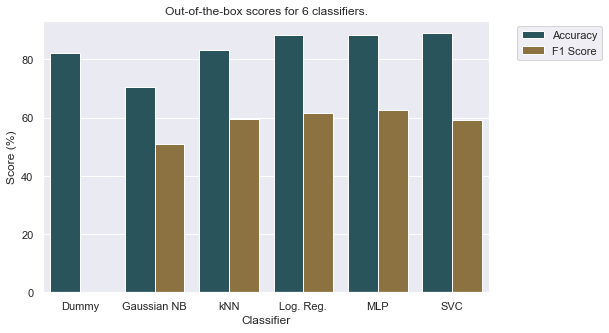

In [27]:
# Format the scores properly
scores = accuracies.copy()
scores.extend(f1_scores)
scores = np.around(100*np.asarray(scores), 2)

# Create data to be inserted into a dataframe for the barplot
data = {'Score Type': ['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
                       'F1 Score','F1 Score','F1 Score','F1 Score','F1 Score','F1 Score'],
        'Classifier': ['Dummy', 'Gaussian NB', 'kNN', 'Log. Reg.', 'MLP', 'SVC',
                      'Dummy', 'Gaussian NB', 'kNN', 'Log. Reg.', 'MLP', 'SVC'],
        'Score (%)': scores}

bardf = pd.DataFrame(data)

palette = {'Accuracy': mycol, 'F1 Score': mycomplcol}

fig = plt.figure(figsize=[8,5])
sns.barplot(x="Classifier", y="Score (%)", hue="Score Type", palette=palette, data=bardf)
plt.title("Out-of-the-box scores for 6 classifiers.")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Βελτιστοποίηση της διαδικασίας

Έχοντας πλέον μια εικόνα ως προς την απαραίτητη προεπεξεργασία, καθώς και ως προς τους ταξινομητές που θα αξιοποιηθούν, προχωράμε στην εύρεση των βέλτιστων υπερπαραμέτρων κάθε βήματος. Η βελτιστοποίηση θα πραγματοποιείται σε κάθε περίπτωση μέσω αναζήτησης πλέγματος με δεκαπλή διασταυρούμενη επικύρωση, όπου φυσικά σε κάθε βήμα οι υπερπαράμετροι θα αφορούν την εκάστοτε μέθοδο.

Το πρώτο βήμα αποτελεί η σύσταση ενός pipeline, το οποίο θα αφορά τη διαδικασία προεπεξεργασίας. Αξιοποιώντας τη γνώση που εξήχθη από την προηγούμενη ανάλυση, είμαστε σε θέση να ορίσουμε ένα pipeline εξατομικευμένο για κάθε ταξινομητή, συνδυάζοντας τα διάφορα στάδια προεπεξεργασίας που παρουσιάστηκαν και ρυθμίζοντας πιθανές υπερπαραμέτρους που εμφανίζονται στο στάδιο αυτό.

Για παράδειγμα, η ακόλουθη διερεύνηση υποδεικνύει ποιες είναι άλλες τιμές που μπορούμε να δοκιμάσουμε για το κατώφλι της `VarianceThreshold`, η οποία αξιοποιήθηκε για τη διαστατική μείωση του προβλήματος:

In [28]:
minvar = X_train_unmod.var(axis=0).min()
maxvar = X_train_unmod.var(axis=0).max()

varrange = maxvar - minvar
for i in range(10):
    varcheck = minvar + varrange*(i+1)/10
    print(f"There are a total of {(X_train_unmod.var(axis=0) < varcheck).sum()} feature(s) with variance lower than {varcheck:.3f}.")

There are a total of 30 feature(s) with variance lower than 0.011.
There are a total of 49 feature(s) with variance lower than 0.017.
There are a total of 65 feature(s) with variance lower than 0.023.
There are a total of 96 feature(s) with variance lower than 0.029.
There are a total of 149 feature(s) with variance lower than 0.036.
There are a total of 205 feature(s) with variance lower than 0.042.
There are a total of 246 feature(s) with variance lower than 0.048.
There are a total of 270 feature(s) with variance lower than 0.054.
There are a total of 281 feature(s) with variance lower than 0.060.
There are a total of 293 feature(s) with variance lower than 0.066.


Τα παραπάνω υποδεικνύουν πως κάποιες καλές υποψήφιες τιμές για το κατώφλι είναι οι 0.011, 0.017, 0.023 και 0.029, καθώς δε θα θέλαμε να αφαιρέσουμε περισσότερα από τα μισά χαρακτηριστικά, όπως συμβαίνει από την τιμή 0.036 και πάνω.

### Gaussian Naive Bayes

Η διαδικασία βελτιστοποίησης θα ξεκινήσει με τον Gaussian Naive Bayes ταξινομητή, για τον οποίο είδαμε πως η κανονικοποίηση των δεδομένων δεν επιφέρει αλλαγές στην επίδοση, επομένως δε θα εφαρμοστεί. Ως προς την εξισορρόπησή του, φάνηκε ο `SMOTE` oversampler να οδηγεί στη βέλτιστη επίδοση. Σε ό,τι αφορά υπερπαραμέτρους του ίδιου του ταξινομητή, η μόνη υπερπαράμετρός του που μπορεί να προσαρμοστεί είναι η `var_smoothing`, η οποία αφορά τις διακυμάνσεις των δεδομένων και φροντίζει να αποφεύγονται διαιρέσεις με τυπικά μηδενικές τιμές. Με βάση αυτά, γράφουμε:

In [29]:
# import the pipeline method
from imblearn.pipeline import Pipeline

# import the new oversampler
from imblearn.over_sampling import SMOTE

selector = VarianceThreshold()
# no scaler required
sampler = SMOTE(random_state=24, n_jobs=-1)
    
clf = GaussianNB()

# pipeline for Gaussian NB
pipe = Pipeline(steps=[('selector', selector), ('sampler', sampler), ('clf', clf)], memory = 'tmp')
    
# import the grid search method
from sklearn.model_selection import GridSearchCV

# to time the training and testing process
import time

# We define a custom function to print diagnostics
# during the training and testing of the estimators.
def EstDiagnostics(estimator,name,scoring):
    
    print(f"Initializing grid search for {name} - set to {scoring} scoring.")
    start_time = time.time()
    estimator.fit(X_train_unmod, y_train)
    stop_time = time.time()
    print("Grid search finished.")
    print(f"Total time elapsed for the training: {(stop_time - start_time):.2f} s.")
    print("Below you can see the best parameters found for this estimator.")
    print(estimator.best_params_)
    start_time = time.time()
    preds = estimator.predict(X_test_unmod)
    stop_time = time.time()
    print(110*"-")
    print(f"The accuracy on the test set is {100*accuracy_score(y_test,preds):.2f}%.")
    print(f"The F1 score on the test set is {100*f1_score(y_test,preds):.2f}%.")
    print(110*"-")
    print(f"Total time elapsed for the testing: {(stop_time - start_time):.2f} s.")
    
    return estimator
    
# Hyperparameters for Gaussian NB
smooths = [1e-11, 1e-10, 1e-9, 1e-8]
vthreshold = [0.0, 0.011, 0.017, 0.023, 0.029]
smote_nbs = [4,5,6,7,8,9,10]

In [30]:
# Grid Search with respect to accuracy score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, sampler__k_neighbors=smote_nbs, clf__var_smoothing=smooths),
                         cv=10, scoring='accuracy', n_jobs=-1)

gnb_acc = EstDiagnostics(estimator,'Gaussian NB Classifier','accuracy')

# Grid Search with respect to f1 score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, sampler__k_neighbors=smote_nbs, clf__var_smoothing=smooths),
                         cv=10, scoring='f1', n_jobs=-1)

gnb_f1 = EstDiagnostics(estimator,'Gaussian NB Classifier','F1')

Initializing grid search for Gaussian NB Classifier - set to accuracy scoring.
Grid search finished.
Total time elapsed for the training: 5.85 s.
Below you can see the best parameters found for this estimator.
{'clf__var_smoothing': 1e-11, 'sampler__k_neighbors': 9, 'selector__threshold': 0.029}
--------------------------------------------------------------------------------------------------------------
The accuracy on the test set is 75.38%.
The F1 score on the test set is 50.83%.
--------------------------------------------------------------------------------------------------------------
Total time elapsed for the testing: 0.00 s.
Initializing grid search for Gaussian NB Classifier - set to F1 scoring.
Grid search finished.
Total time elapsed for the training: 3.71 s.
Below you can see the best parameters found for this estimator.
{'clf__var_smoothing': 1e-11, 'sampler__k_neighbors': 7, 'selector__threshold': 0.029}
------------------------------------------------------------------

Φαίνεται η βελτιστοποίηση ως προς την ορθότητα να δίνει ίδια ορθότητα στο σύνολο αξιολόγησης σε σχέση με τη βελτιστοποίηση ως προς το F1 Score, όμως ελαφρώς μειωμένο F1 Score (~1.5%), επομένως θεωρούμε πως ο βέλτιστος ταξινομητής Gausian Naive Bayes είναι αυτός με `var_smoothing` = $10^{-11}$, `k_neighbors` = 7 για τον `SMOTE` και `threshold` = 0.029 για την `VarianceThreshold`. Την ίδια διαδικασία καλούμαστε να ακολουθήσουμε και για τους υπόλοιπους ταξινομητές.

In [31]:
# Initialization of a dict of estimators
Estimators = {}

# Add the dummy
Estimators[0] = DummyClassifier().fit(X_train_unmod,y_train)

# Add the optimized estimator in a dict
Estimators[1] = gnb_f1

### k-Nearest Neighbors

Συνεχίζοντας με τον kNN, η υπερπαράμετρος που θα ληφθεί υπ' όψιν θα είναι φυσικά το πλήθος πλησιέστερων γειτόνων. Σε ό,τι αφορά το pipeline προεπεξεργασίας, η λογική για την `VarianceThreshold` είναι ίδια με πριν. Πέρα από αυτό, με βάση την προηγούμενη ανάλυση, δεν πραγματοποιείται ούτε scaling ούτε oversampling.

In [32]:
selector = VarianceThreshold()
# no scaler required
# no sampler required
    
clf = neighbors.KNeighborsClassifier(n_jobs=-1)

# pipeline for kNN
pipe = Pipeline(steps=[('selector', selector), ('clf', clf)], memory = 'tmp')

# Hyperparameters for kNN
neighbs = np.linspace(3,14).astype('int')
vthreshold = [0.0, 0.011, 0.017, 0.023, 0.029]

# Grid Search with respect to accuracy score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, clf__n_neighbors=neighbs),
                         cv=10, scoring='accuracy', n_jobs=-1)

knn_acc = EstDiagnostics(estimator,'kNN Classifier','accuracy')

# Grid Search with respect to f1 score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, clf__n_neighbors=neighbs),
                         cv=10, scoring='f1', n_jobs=-1)

knn_f1 = EstDiagnostics(estimator,'kNN Classifier','F1')

Initializing grid search for kNN Classifier - set to accuracy scoring.
Grid search finished.
Total time elapsed for the training: 11.09 s.
Below you can see the best parameters found for this estimator.
{'clf__n_neighbors': 8, 'selector__threshold': 0.023}
--------------------------------------------------------------------------------------------------------------
The accuracy on the test set is 85.48%.
The F1 score on the test set is 61.82%.
--------------------------------------------------------------------------------------------------------------
Total time elapsed for the testing: 0.05 s.
Initializing grid search for kNN Classifier - set to F1 scoring.
Grid search finished.
Total time elapsed for the training: 10.87 s.
Below you can see the best parameters found for this estimator.
{'clf__n_neighbors': 8, 'selector__threshold': 0.023}
--------------------------------------------------------------------------------------------------------------
The accuracy on the test set is 85.

Σε ό,τι αφορά τα αποτελέσματα για τον kNN, ο οποίος επίσης σημειώνει βελτίωση, αν και όχι σημαντικά υψηλή, σε σχέση με την out-of-the-box επίδοσή του, φαίνεται η βελτιστοποίηση ως προς το F1 Score να δίνει τα ίδια αποτελέσματα με τη βελτιστοποίηση ως προς την ορθότητα και συγκεκριμένα πλήθος 8 γειτόνων και κατώφλι για την `VarianceThreshold` ίσο με 0.023.

In [33]:
# Add the kNN Classifier to the dict of optimized estimators
Estimators[2] = knn_acc

### Logistic Regression

Προχωρώντας στον ταξινομητή λογιστικής παλινδρόμησης, υπενθυμίζουμε πως η κανονικοποίηση μειώνει την απόδοσή του, ενώ η εξισορρόπηση φαίνεται να βελτιώνει την απόδοσή του, αλλά κατά λιγότερο από 2% στο σύνολο εκπαίδευσης. Το γεγονός αυτό υποδεικνύει πως η τεχνητή εξισορρόπηση του συνόλου εκπαίδευσης ενέχει υψηλό κίνδυνο να δημιουργήσει ένα bias το οποίο θα μειώσει την τελική επίδοση του ταξινομητή, όταν αυτός αξιολογηθεί στο σύνολο αξιολόγησης. Με λίγα λόγια, επιλέγουμε να μη ρισκάρουμε μια βελτίωση η οποία ενδέχεται να δημιουργείται λόγω υπερπροσαρμογής, τη στιγμή που το κέρδος σε απόδοση είναι μικρό. Ως προς τις υπερπαραμέτρους του ίδιου του ταξινομητή, αυτές που θα ληφθούν υπ' όψιν είναι ο αλγόριθμος που θα πραγματοποιήσει τη βελτιστοποίηση, καθώς και το αντίστροφο του παράγοντα ομαλοποίησης. Έχουμε, επομένως:

In [34]:
selector = VarianceThreshold()
# no scaler required
# no sampler will be used
    
clf = LogisticRegression(n_jobs=-1)

# pipeline for Log. Reg.
pipe = Pipeline(steps=[('selector', selector), ('clf', clf)], memory = 'tmp')

# Hyperparameters for logistic regression
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
Cs = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
vthreshold = [0.0, 0.011, 0.017, 0.023, 0.029]

# Grid Search with respect to accuracy score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, clf__C=Cs, clf__solver=solvers), cv=10, scoring='accuracy', n_jobs=-1)

logreg_acc = EstDiagnostics(estimator, 'Logistic Regression Classifier','accuracy')

# Grid Search with respect to f1 score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, clf__C=Cs, clf__solver=solvers), cv=10, scoring='f1', n_jobs=-1)

logreg_f1 = EstDiagnostics(estimator, 'Logistic Regression Classifier','F1')

Initializing grid search for Logistic Regression Classifier - set to accuracy scoring.
Grid search finished.
Total time elapsed for the training: 59.44 s.
Below you can see the best parameters found for this estimator.
{'clf__C': 1.0, 'clf__solver': 'saga', 'selector__threshold': 0.0}
--------------------------------------------------------------------------------------------------------------
The accuracy on the test set is 88.38%.
The F1 score on the test set is 62.16%.
--------------------------------------------------------------------------------------------------------------
Total time elapsed for the testing: 0.00 s.
Initializing grid search for Logistic Regression Classifier - set to F1 scoring.
Grid search finished.
Total time elapsed for the training: 59.58 s.
Below you can see the best parameters found for this estimator.
{'clf__C': 1.0, 'clf__solver': 'saga', 'selector__threshold': 0.0}
----------------------------------------------------------------------------------------

Οι προκύπτοντες ταξινομητές ταυτίζονται για κάθε τύπου βελτιστοποίηση και, συγκεκριμένα, χρησιμοποιούν ως solver τον saga, με κατώφλι της `VarianceThreshold` ίσο με το μηδέν και την default τιμή για το αντίστροφο του παράγοντα ομαλοποίησης. Συγκρίνοντας με τα out-of-the-box αποτελέσματα, βλέπουμε πως υπάρχει μια βελτίωση, η οποία όμως δεν είναι σε καμία περίπτωση υψηλή. Εγείρεται, επομένως, το ερώτημα, εάν η εξισορρόπηση εν τέλει θα ήταν χρήσιμη στην περίπτωση αυτή. Καθαρά για λόγους διερεύνησης, ας δούμε παρακάτω την αντίστοιχη επίδοση στο σύνολο αξιολόγησης, εφαρμόζοντας τον `SMOTE` για oversampling, ώστε να δούμε εάν η επιλογή μας ήταν ορθή ή όχι.

In [35]:
# Try to introduce oversampling and see if the previous results get better or worse
sampler = SMOTE(random_state=24, n_jobs=-1)
clf = LogisticRegression(solver='saga', n_jobs=-1)

# pipeline for Log. Reg.
pipe = Pipeline(steps=[('sampler', sampler), ('clf', clf)], memory = 'tmp')

# Hyperparameter for SMOTE
smote_nbs = [4,5,6,7,8,9,10]

# Grid Search with respect to accuracy score
estimator = GridSearchCV(pipe, dict(sampler__k_neighbors=smote_nbs), cv=10, scoring='accuracy', n_jobs=-1)

logreg_alt = EstDiagnostics(estimator,'Logistic Regression Classifier','accuracy')

Initializing grid search for Logistic Regression Classifier - set to accuracy scoring.
Grid search finished.
Total time elapsed for the training: 6.17 s.
Below you can see the best parameters found for this estimator.
{'sampler__k_neighbors': 10}
--------------------------------------------------------------------------------------------------------------
The accuracy on the test set is 81.74%.
The F1 score on the test set is 60.71%.
--------------------------------------------------------------------------------------------------------------
Total time elapsed for the testing: 0.00 s.


Η επιλογή μας να παραλείψουμε το βήμα εξισορρόπησης φαίνεται a posteriori να ήταν ορθή, καθώς βλέπουμε τη σημαντική μείωση που αυτή θα επέφερε, τόσο ως προς την ορθότητα, όσο και ως προς το F1 Score του ταξινομητή.

In [36]:
# Add the Log. Reg. Classifier to the dict of optimized estimators
Estimators[3] = logreg_acc

### Multiple Layer Perceptron (MLP)

Ο επόμενος σταθμός είναι το νευρωνικό δίκτυο MLP. Η διερεύνηση ως προς την απαραίτητη προεπεξεργασία υπέδειξε πως η κανονικοποίηση μέσω `StandardScaler` βελτιώνει ελαφρώς την επίδοσή του, ενώ το oversampling φαίνεται να οδηγεί σε τόσο σημαντική βελτίωση που το ρίσκο αυτή να αποτελεί οφθαλμαπάτη αξίζει να ληφθεί, με τον κίνδυνο εν τέλει να οδηγηθούμε σε μείωση της απόδοσης. Η βελτιστοποίησή του θα γίνει σε δύο βήματα: αρχικά, θα διερευνηθούν το βέλτιστο πλήθος layers, η καλύτερη συνάρτηση ενεργοποίησης, καθώς και ο καλύτερος optimizer. Κατόπιν, για δεδομένα αποτελέσματα της πρώτης αναζήτησης πλέγματος, θα διερευνηθούν περαιτέρω άλλες υπερπαράμετροι, οι οποίες εξαρτώνται από την επιλογή συνάρτησης ενεργοποίησης και optimizer. Φυσικά, για το πρώτο βήμα δε θα αξιοποιηθούν τα δεδομένα αξιολόγησης, αλλά η επικύρωση θα γίνει στα δεδομένα εκπαίδευσης.

In [37]:
def MLPDiagnostics(estimator,X,y,scoring):
    
    print(f"Initializing grid search for MLP - set to {scoring} scoring.")
    start_time = time.time()
    estimator.fit(X_train_unmod, y_train)
    stop_time = time.time()
    print("Grid search finished.")
    print(f"Total time elapsed for the training: {(stop_time - start_time):.2f} s.")
    print("Below you can see the best parameters found for this estimator.")
    print(estimator.best_params_)
    start_time = time.time()
    preds = estimator.predict(X)
    stop_time = time.time()
    print(110*"-")
    print(f"The accuracy on the train set is {100*accuracy_score(y,preds):.2f}%.")
    print(f"The F1 score on the train set is {100*f1_score(y,preds):.2f}%.")
    print(110*"-")
    print(f"Total time elapsed for the testing: {(stop_time - start_time):.2f} s.")
    
    return estimator

In [38]:
selector = VarianceThreshold()
scaler = preprocessing.StandardScaler()
sampler = SMOTE(random_state=24, n_jobs=-1)
    
clf = MLPClassifier(batch_size=32,random_state=24,early_stopping=True,validation_fraction=0.15) # early stopping to avoid overfitting for reasons other than data balancing

# pipeline for MLP
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('clf', clf)], memory = 'tmp')

# Hyperparameters for round 1 of MLP optimization
activations = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['adam', 'lbfgs', 'sgd']
hiddens = [(100,),(100,100),(100,100,100),(100,100,100,100)]

# Grid Search with respect to accuracy score
estimator = GridSearchCV(pipe, dict(clf__hidden_layer_sizes=hiddens, clf__activation=activations, clf__solver=solvers),
                         cv=10, scoring='accuracy', n_jobs=-1)

mlp_ini_acc = MLPDiagnostics(estimator,X_train_unmod,y_train,'accuracy')

# Grid Search with respect to f1 score
estimator = GridSearchCV(pipe, dict(clf__hidden_layer_sizes=hiddens, clf__activation=activations, clf__solver=solvers),
                         cv=10, scoring='f1', n_jobs=-1)

mlp_ini_f1 = MLPDiagnostics(estimator,X_train_unmod,y_train,'F1')

Initializing grid search for MLP - set to accuracy scoring.
Grid search finished.
Total time elapsed for the training: 158.01 s.
Below you can see the best parameters found for this estimator.
{'clf__activation': 'relu', 'clf__hidden_layer_sizes': (100, 100), 'clf__solver': 'adam'}
--------------------------------------------------------------------------------------------------------------
The accuracy on the train set is 98.99%.
The F1 score on the train set is 97.24%.
--------------------------------------------------------------------------------------------------------------
Total time elapsed for the testing: 0.01 s.
Initializing grid search for MLP - set to F1 scoring.
Grid search finished.
Total time elapsed for the training: 159.42 s.
Below you can see the best parameters found for this estimator.
{'clf__activation': 'relu', 'clf__hidden_layer_sizes': (100, 100), 'clf__solver': 'adam'}
--------------------------------------------------------------------------------------------

Μιας και το σύνολο επικύρωσης για αυτό το πρώτο βήμα αναζήτησης πλέγματος αποτέλεσε ένα κομμάτι του συνόλου εκπαίδευσης, η παράμετρος early stopping εισήχθη προκειμένου να αποφευχθεί η υπερπροσαρμογή του μοντέλου στα δεδομένα. Τα αποτελέσματα που προκύπτουν φαίνονται τόσο εντυπωσιακά, που μας οδηγούν στο συμπέρασμα πως μάλλον η εξισορρόπηση πράγματι οδηγεί σε σημαντική υπερπροσαρμογή, καθώς δεν είναι λογικό η αλλαγή συνάρτησης ενεργοποίησης ή του optimizer να οδηγεί σε βελτίωση 88% -> 99% στην ορθότητα και τόσο υψηλό F1 Score. Για το λόγο αυτό, στο επόμενο βήμα βελτιστοποίησης θα την αφαιρέσουμε από το pipeline.

Σε κάθε περίπτωση, φαίνεται ο ιδανικός optimizer να είναι ο adam και η ιδανική συνάρτηση ενεργοποίησης η relu, με το πλήθος των layers να δίνουν βέλτιστα αποτελέσματα στη ρύθμιση (100,100). Έτσι, προχωράμε στην τελική βελτιστοποίηση του μοντέλου, ορίζοντας εκ νέου το παραπάνω pipeline και αυτή τη φορά ρυθμίζοντας τις υπερπαραμέτρους `threshold` του `VarianceThreshold`, καθώς και τις `alpha`, `learning_rate_init` και `beta_1`, του MLP, οι οποίες είναι συμβατές με τον adam. 

In [39]:
selector = VarianceThreshold()
scaler = preprocessing.StandardScaler()
# no sampler added after all
    
clf = MLPClassifier(hidden_layer_sizes=(100,100),activation='relu',solver='adam',
                    batch_size=32, random_state=24,early_stopping=True,validation_fraction=0.15)

# pipeline revisited
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('clf', clf)], memory = 'tmp')

# Hyperparameters for round 2 of MLP optimization
alphas = [0.0001,0.0005,0.001,0.0015]
lrs = [0.001, 0.002, 0.005, 0.01]
betas = [0.85, 0.9, 0.92, 0.95]
vthreshold = [0.0, 0.011, 0.017, 0.023, 0.029]

# Grid Search with respect to accuracy score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, clf__alpha=alphas, clf__beta_1=betas,
                                    clf__learning_rate_init=lrs), cv=10, scoring='accuracy', n_jobs=-1)

mlp_acc = MLPDiagnostics(estimator,X_test_unmod,y_test,'accuracy')

# Grid Search with respect to f1 score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, clf__alpha=alphas, clf__beta_1=betas,
                                    clf__learning_rate_init=lrs), cv=10, scoring='f1', n_jobs=-1)

mlp_f1 = MLPDiagnostics(estimator,X_test_unmod,y_test,'F1')

Initializing grid search for MLP - set to accuracy scoring.
Grid search finished.
Total time elapsed for the training: 242.55 s.
Below you can see the best parameters found for this estimator.
{'clf__alpha': 0.001, 'clf__beta_1': 0.85, 'clf__learning_rate_init': 0.002, 'selector__threshold': 0.0}
--------------------------------------------------------------------------------------------------------------
The accuracy on the train set is 88.38%.
The F1 score on the train set is 69.12%.
--------------------------------------------------------------------------------------------------------------
Total time elapsed for the testing: 0.00 s.
Initializing grid search for MLP - set to F1 scoring.
Grid search finished.
Total time elapsed for the training: 241.67 s.
Below you can see the best parameters found for this estimator.
{'clf__alpha': 0.0015, 'clf__beta_1': 0.95, 'clf__learning_rate_init': 0.001, 'selector__threshold': 0.029}
-----------------------------------------------------------

Η βελτιστοποίηση ως προς την ορθότητα δίνει πολύ καλύτερα αποτελέσματα, με τον τελικό εκτιμητή να έχει μηδενικό κατώφλι για την `VarianceThreshold`, ρυθμό εκμάθησης ίσο με 0.002, και παραμέτρους `alpha` και `beta_1` ίσες με 0.001 και 0.85, αντίστοιχα. Κρίνοντας από το τελικό αποτέλεσμα φαίνεται πως η βελτίωση σε σχέση με την out-of-the-box επίδοση δεν υφίσταται ως προς την ορθότητα (τα αποτελέσματα είναι σχεδόν ίσα), αν και σημειώνεται μια άξια αναφοράς βελτίωση σε ό,τι έχει να κάνει με το F1 Score. Εγείρεται, επομένως, ξανά το ερώτημα σχετικά με το εάν η επιλογή μας να αφαιρέσουμε τη διαδικασία εξισορρόπησης από το pipeline ήταν ορθή.

Ας δοκιμάσουμε, για του λόγου το αληθές, να δούμε τι θα παίρναμε εάν είχαμε επιλέξει να πραγματοποιήσουμε και εξισορρόπηση των δεδομένων εκπαίδευσης στην περίπτωση του MLP, όπως κάναμε (καθαρά διερευνητικά) και για την περίπτωση της λογιστικής παλινδρόμησης. Για το σκοπό αυτό, δεν θα πραγματοποιήσουμε πλήρη αναζήτηση πλέγματος (αν και αυτό θα ήταν το συνεπέστερο), παρά θα χρησιμοποιήσουμε τα παραπάνω αποτελέσματα για τις παραμέτρους του MLP, προσθέτοντας στο pipeline ξανά μια διαδικασία `SMOTE`.

In [40]:
selector = VarianceThreshold()
scaler = preprocessing.StandardScaler()
sampler = SMOTE(random_state=24, n_jobs=-1)
    
clf = MLPClassifier(hidden_layer_sizes=(100,100),activation='relu',solver='adam',
                    alpha=0.001, beta_1=0.85, learning_rate_init=0.002, batch_size=32,
                    random_state=24,early_stopping=True,validation_fraction=0.15)

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler',sampler), ('clf', clf)], memory = 'tmp')

# Grid Search with respect to accuracy score
estimator = GridSearchCV(pipe, dict(sampler__k_neighbors=[4,5,6,7,8,9,10]), cv=10, scoring='accuracy', n_jobs=-1)

mlp_alt = MLPDiagnostics(estimator,X_test_unmod,y_test,'accuracy')

Initializing grid search for MLP - set to accuracy scoring.
Grid search finished.
Total time elapsed for the training: 11.42 s.
Below you can see the best parameters found for this estimator.
{'sampler__k_neighbors': 4}
--------------------------------------------------------------------------------------------------------------
The accuracy on the train set is 88.80%.
The F1 score on the train set is 69.43%.
--------------------------------------------------------------------------------------------------------------
Total time elapsed for the testing: 0.00 s.


Εκ του αποτελέσματος, η επιλογή μας φαίνεται μάλλον άνευ σημασίας, αφού η εξισορρόπηση φαίνεται να οδηγεί σε μια ελάχιστη αύξηση της ορθότητας και του F1 Score (της τάξης του 0.5%), αυτό όμως παίρνοντας ως δεδομένη τη ρύθμιση των υπόλοιπων υπερπαραμέτρων (μια εκ νέου αναζήτηση πλέγματος σε όλες τις υπερπαραμέτρους, συμπεριλαμβανομένης αυτής που εισάγεται από τον `SMOTE`, ενδέχεται να οδηγούσε σε χαμηλότερη επίδοση συνολικά).

In [41]:
# Add the MLP to the dict of optimized estimators
Estimators[4] = mlp_acc

### Support Vector Classifier

Ολοκληρώνοντας τη διαδικασία αυτή βελτιστοποίησης, προχωρούμε και στον ταξινομητή διανυσμάτων υποστήριξης, για τον οποίο η προεπεξεργασία μας οδήγησε στο συμπέρασμα πως η κανονικοποίηση μέσω `StandardScaler` έχει νόημα, όμως η εξισορρόπηση μάλλον ενέχει υψηλό ρίσκο υπερπροσαρμογής και άρα μείωση της επίδοσης. Σε ό,τι αφορά την προς ρύθμιση υπερπαράμετρο του ταξινομητή, αυτή είναι φυσικά η συνάρτηση πυρήνα που θα χρησιμοποιηθεί.

In [42]:
selector = VarianceThreshold()
scaler = preprocessing.StandardScaler()
# no sampler
    
clf = SVC(random_state=24)

# pipeline for SVC
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('clf', clf)], memory = 'tmp')

# Hyperparameter for SVC
kernels=['linear', 'poly', 'rbf', 'sigmoid']
vthreshold = [0.0, 0.011, 0.017, 0.023, 0.029]

# Grid Search with respect to accuracy score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, clf__kernel=kernels), cv=10, scoring='accuracy', n_jobs=-1)

svc_acc = EstDiagnostics(estimator,'Support Vector Classifier','accuracy')

# Grid Search with respect to f1 score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, clf__kernel=kernels), cv=10, scoring='f1', n_jobs=-1)

svc_f1 = EstDiagnostics(estimator,'Support Vector Classifier','F1')

Initializing grid search for Support Vector Classifier - set to accuracy scoring.
Grid search finished.
Total time elapsed for the training: 11.33 s.
Below you can see the best parameters found for this estimator.
{'clf__kernel': 'rbf', 'selector__threshold': 0.017}
--------------------------------------------------------------------------------------------------------------
The accuracy on the test set is 90.04%.
The F1 score on the test set is 66.67%.
--------------------------------------------------------------------------------------------------------------
Total time elapsed for the testing: 0.07 s.
Initializing grid search for Support Vector Classifier - set to F1 scoring.
Grid search finished.
Total time elapsed for the training: 11.30 s.
Below you can see the best parameters found for this estimator.
{'clf__kernel': 'rbf', 'selector__threshold': 0.017}
--------------------------------------------------------------------------------------------------------------
The accuracy on

Παρατηρούμε πως η βέλτιστη συνάρτηση πυρήνα είναι και η default, δηλαδή η rbf, οπότε η αρκετά υψηλή διαφορά που βλέπουμε στο F1 Score σε σχέση με την out-of-the-box επίδοση οφείλεται στην κανονικοποίηση και τον ορισμό ενός κατωφλίου για τις διακυμάνσεις ίσο με 0.017.

Για λόγους πληρότητας, θα διερευνήσουμε και την περίπτωση όπου πραγματοποιούσαμε και εξισορρόπηση του συνόλου:

In [43]:
selector = VarianceThreshold()
scaler = preprocessing.StandardScaler()
sampler = SMOTE(random_state=24, n_jobs=-1)
    
clf = SVC(random_state=24)

# pipeline for SVC
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler',sampler), ('clf', clf)], memory = 'tmp')
#

# Hyperparameter for SVC
kernels=['linear', 'poly', 'rbf', 'sigmoid']
vthreshold = [0.0, 0.011, 0.017, 0.023, 0.029]

# Grid Search with respect to accuracy score
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, sampler__k_neighbors=[4,5,6,7,8,9,10],
                                   clf__kernel=kernels), cv=10, scoring='accuracy', n_jobs=-1)

svc_alt = EstDiagnostics(estimator,'Support Vector Classifier','accuracy')

Initializing grid search for Support Vector Classifier - set to accuracy scoring.
Grid search finished.
Total time elapsed for the training: 222.53 s.
Below you can see the best parameters found for this estimator.
{'clf__kernel': 'rbf', 'sampler__k_neighbors': 6, 'selector__threshold': 0.0}
--------------------------------------------------------------------------------------------------------------
The accuracy on the test set is 89.07%.
The F1 score on the test set is 67.76%.
--------------------------------------------------------------------------------------------------------------
Total time elapsed for the testing: 0.12 s.


Ξανά, η ορθότητα φαίνεται να μειώνεται ελαφρώς, αν και η μείωση αυτή εξισορροπείται ίσως από μια αύξηση της τάξης του 1% στο F1 Score. Όπως και στην περίπτωση του MLP, λοιπόν, μπορούμε να συμπεράνουμε πως η επιλογή μας σε ό,τι αφορά την εξισορρόπηση δεν οδήγησε σε σημαντικές διαφορές, σε αντίθεση με όσα είδαμε στην περίπτωση της λογιστικής παλινδρόμησης (όπου η αφαίρεση της εξισορρόπησης από το pipeline οδήγησε σε πολύ καλύτερα αποτελέσματα) ή στην περίπτωση του Gaussian NB (όπου η προσθήκη της εξισορρόπησης στο pipeline οδήγησε σε σημαντική βελτίωση σε σχέση με την out-of-the-box επίδοση).

In [44]:
# Add the SVC to the dict of optimized estimators
Estimators[5] = svc_acc

## Τελικά συμπεράσματα

Έχοντας πλέον ολοκληρώσει τη διαδικασία βελτιστοποίησης και έχοντας αποθηκεύσει τη βελτιστοποιημένη εκδοχή κάθε ταξινομητή στο dictionary Estimators, μπορούμε να συγκεντρώσουμε τα αποτελέσματά τους ως προς την ορθότητα και το F1 Score, όπως αξιολογούνται στο σύνολο αξιολόγησης, σε έναν πίνακα markdown. Πέραν αυτών, συγκεντρώνουμε και τους αντίστοιχους χρόνους εκπαίδευσης (train time) και αξιολόγησης (test time), καθώς και τη μεταβολή της επίδοσής τους σε σχέση με την out-of-the-box επίδοση (update). Σημειώνεται πως στην περίπτωση του MLP, όπου η βελτιστοποίηση έγινε σε δύο βήματα, παρατίθεται στον πίνακα ως χρόνος εκπαίδευσης το άθροισμα των επί μέρους χρόνων εκπαίδευσης κάθε βήματος.

|  |  |   Dummy   | Gaussian NB | kNN | Logistic Regression | MLP | SVC |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| **Accuracy** | **Score (%)** <br> **Update (%)** | 82.16 <br> 0.00 | 75.38 <br> <font color='green'>+4.84</font> | 85.48 <br> <font color='green'>+2.35</font> | 88.38 <br> <font color='green'>+0.14</font> | 88.38 <br> <font color='green'>+0.97</font> | 90.04 <br> <font color='green'>+1.11</font> |
| **F1 Score** | **Score (%)** <br> **Update (%)** | 0.00 <br> 0.00 | 52.15 <br> <font color='green'>+1.12</font> | 61.82 <br> <font color='green'>+2.22</font> | 62.16 <br> <font color='green'>+0.62</font>  | 69.12 <br> <font color='green'>+2.95</font> | 66.67 <br> <font color='green'>+7.49</font> |
|  | **Train Time (s)** | - | 3.71 | 10.87 | 59.44 | 400.56 | 11.30 |
|  | **Test Time (s)** | - | 0.00 | 0.06 | 0.00 | 0.00 | 0.07 |

Τα ίδια αποτελέσματα, πλην των χρόνων εκπαίδευσης, παρουσιάζονται και στο επόμενο bar plot σύγκρισης, κατ' αντιστοιχία με αυτό που κατασκευάστηκε για την out-of-the-box περίπτωση.

<Figure size 792x360 with 0 Axes>

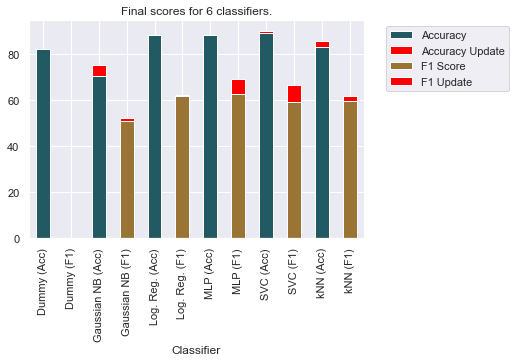

In [45]:
# Gather the scores from each estimator
accuracies_upd = []
f1_scores_upd = []

for i in range(6):
    est = Estimators[i]
    preds = est.predict(X_test_unmod)
    accuracies_upd.append(accuracy_score(y_test,preds))
    f1_scores_upd.append(f1_score(y_test,preds))

# Format the scores properly
scores_upd = accuracies_upd.copy()
scores_upd.extend(f1_scores_upd)
scores_upd = np.around(100*np.asarray(scores_upd), 2)

diffs = scores_upd-scores

final_dat = scores.copy().tolist()
final_dat.extend(diffs)

# Create data to be inserted into a dataframe for the barplot
data_upd = {'Score Type': ['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
                           'F1 Score','F1 Score','F1 Score','F1 Score','F1 Score','F1 Score',
                           'Accuracy Update','Accuracy Update','Accuracy Update','Accuracy Update','Accuracy Update','Accuracy Update',
                           'F1 Update','F1 Update','F1 Update','F1 Update','F1 Update','F1 Update'],
        'Classifier': ['Dummy (Acc)', 'Gaussian NB (Acc)', 'kNN (Acc)', 'Log. Reg. (Acc)', 'MLP (Acc)', 'SVC (Acc)',
                       'Dummy (F1)', 'Gaussian NB (F1)', 'kNN (F1)', 'Log. Reg. (F1)', 'MLP (F1)', 'SVC (F1)',
                       'Dummy (Acc)', 'Gaussian NB (Acc)', 'kNN (Acc)', 'Log. Reg. (Acc)', 'MLP (Acc)', 'SVC (Acc)',
                       'Dummy (F1)', 'Gaussian NB (F1)', 'kNN (F1)', 'Log. Reg. (F1)', 'MLP (F1)', 'SVC (F1)'],
        'Score (%)': final_dat}

bardf_upd = pd.DataFrame(data_upd)

fig = plt.figure(figsize=[11,5])

new_cmap = colors.ListedColormap([mycol, 'red', mycomplcol, 'red'])
df_pivot = pd.pivot_table(bardf_upd, index='Classifier', columns='Score Type', values='Score (%)', aggfunc='sum')
im = df_pivot.plot.bar(stacked=True, colormap=new_cmap)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Final scores for 6 classifiers.")
plt.show()

Γίνεται εμφανές πως ο χειρότερος, συγκριτικά, ταξινομητής είναι ο Gaussian Naive Bayes. Μια πιθανή εξήγηση για αυτό είναι πως το παρόν σύνολο δεδομένων αφορά εικόνες, οι οποίες είναι αντικείμενα με χαρακτηριστικά (συνήθως pixels) που δε μπορούν σε καμία περίπτωση να θεωρηθούν ανεξάρτητες και ομοιόμορφα κατανεμημένες τυχαίες μεταβλητές, όπως υποθέτει ο NB.

Αξίζει στο σημείο αυτό να σχολιαστεί πως αυτός ίσως είναι και ο λόγος για τον οποίο η προεπεξεργασία των δεδομένων φάνηκε να οδηγεί σε πολύ μικρές βελτιώσεις ή ακόμη και σε αρνητικές μεταβολές στην αξιολόγηση των ταξινομητών. Τόσο το πλήθος των χαρακτηριστικών, όσο και το γεγονός πως καθένα εξ αυτών λάμβανε τιμές στο διάστημα [0,1], φαίνεται να υποδεικνύει πως τα χαρακτηριστικά ήταν, ή τουλάχιστον είχαν σχέση, με pixels. Έτσι, η μη προσεκτική μεταβολή της αρχικής τους μορφής μπορεί πάρα πολύ εύκολα να οδηγήσει σε αποτελέσματα όπως αυτά που είδαμε όταν δοκιμάσαμε, για παράδειγμα, να κανονικοποιήσουμε τα δεδομένα πριν τα εισαγάγουμε στον ταξινομητή λογιστικής παλινδρόμησης. Στο ίδιο γεγονός ενδέχεται να οφείλεται και το εκ πρώτης όψεως παράδοξο πως το oversampling μέσω `SMOTE`, ο οποίος γεννά νέα δεδομένα, οδηγούσε σε μειωμένη επίδοση των ταξινομητών, παρότι το σύνολο δεδομένων είναι σημαντικά μη ισορροπημένο ως προς την ταξινόμηση urban/non-urban.

Ο αμέσως επόμενος σε επίδοση ταξινομητής, αγνοώντας πάντα τον Dummy, φαίνεται να είναι ο kNN. Το αποτέλεσμα αυτό μπορεί να αποδοθεί σίγουρα εν μέρει στο γεγονός πως η αρχή λειτουργίας του είναι αρκετά απλοϊκή για να μπορέσει να ανταπεξέλθει με απόδοση παρόμοια με αυτήν πιο σύνθετων ταξινομητών (π.χ. το νευρωνικό δίκτυο).

Σε ό,τι αφορά τους υπόλοιπους τρεις ταξινομητές, οι τελικές τους επιδόσεις μπορούν να χαρακτηριστούν ως αρκετά υψηλές, με τον ταξινομητή διανυσμάτων υποστήριξης να σημειώνει τη μεγαλύτερη επίδοση ως προς την ορθότητα και το MLP να δίνει τα βέλτιστα αποτελέσματα ως προς το F1 Score.

Προκειμένου να αποκτήσουμε μια εικόνα ως προς το ποιο είναι το εύρος βελτιστοποίησης ανάμεσα στους ταξινομητές, αφότου πρώτα ορίσουμε ορισμένες βοηθητικές συναρτήσεις, απεικονίζουμε παρακάτω τους πίνακες σύγχυσης που προκύπτουν από την ταξινόμηση των δεδομένων αξιολόγησης από τον τελικό Gaussian NB (αριστερά), ο οποίος σημείωσε τη χαμηλότερη επιτυχία και από τον τελικό SVC (δεξιά), ο οποίος σημείωσε την υψηλότερη επιτυχία.

In [46]:
# Custom colormap
def CustomCmap(from_rgb,to_rgb):

    # from color r,g,b
    r1,g1,b1 = from_rgb

    # to color r,g,b
    r2,g2,b2 = to_rgb

    cdict = {'red': ((0, r1, r1),
                   (1, r2, r2)),
           'green': ((0, g1, g1),
                    (1, g2, g2)),
           'blue': ((0, b1, b1),
                   (1, b2, b2))}

    cmap = colors.LinearSegmentedColormap('custom_cmap', cdict)
    return cmap

mycmap = CustomCmap([1.00, 1.00, 1.00], [0.13333, 0.35294, 0.38824]) # from white to teal

from sklearn.metrics import confusion_matrix
import itertools

from mpl_toolkits.axes_grid1 import make_axes_locatable
    
matplotlib.rc_file_defaults() # to remove the sns darkgrid style

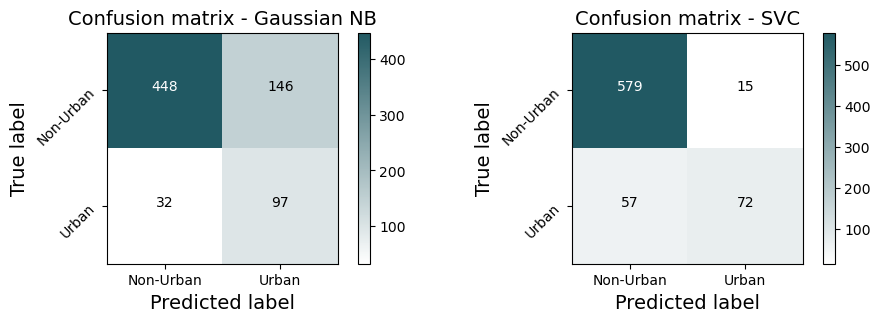

In [47]:
classes = ['Non-Urban','Urban']

preds_nb = Estimators[1].predict(X_test_unmod)
cfmatrix_nb = confusion_matrix(y_test, preds_nb)

preds_svc = Estimators[5].predict(X_test_unmod)
cfmatrix_svc = confusion_matrix(y_test, preds_svc)

fig, [ax1,ax2] = plt.subplots(1,2, figsize=(11,3))

for ax,cm,title in zip([ax1,ax2],[cfmatrix_nb,cfmatrix_svc],['Gaussian NB','SVC']):
    im = ax.imshow(cm, interpolation='nearest', cmap=mycmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=.2)
    plt.colorbar(im, cax=cax) #, ticks=[-1,-0.5,0,0.5,1]
    ax.set_title(f'Confusion matrix - {title}',fontsize=14)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, rotation=45)
    
    fmt = 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label',fontsize=14)
    ax.set_xlabel('Predicted label',fontsize=14)
    
plt.show()

Κλείνοντας την παρούσα ανάλυση, συμπεραίνουμε πως ο προτεινόμενος ταξινομητής για το συγκεκριμένο πρόβλημα καθορίζεται βάσει του σκοπού που θέλουμε να επιτελεί. Συγκεκριμένα, τα σημαντικά προτερήματα του SVC είναι πως σημειώνει την υψηλότερη απόδοση ως προς την ορθότητα, χωρίς να χρειάζεται ιδιαίτερα υψηλούς χρόνους εκπαίδευσης, ειδικά σε σύγκριση με το νευρωνικό δίκτυο.

Από την άλλη, όπως φαίνεται στον παραπάνω πίνακα σύγχυσης, ο SVC δείχνει να έχει μια τάση να μην ταξινομεί δεδομένα ως urban, το οποίο φαίνεται από το γεγονός πως τα μη διαγώνια στοιχεία εμφανίζουν σημαντική σχετική απόκλιση (το ένα είναι σχεδόν τετραπλάσιο από το άλλο). Ρίχνοντας μια ματιά στον αντίστοιχο πίνακα σύγχυσης για το νευρωνικό δίκτυο, παρατηρούμε πως παρότι η συνολική του ορθότητα είναι χαμηλότερη από του SVC, εάν κανείς θέλει έναν λιγότερο biased ταξινομητή τότε σίγουρα αυτός είναι που προτείνεται.

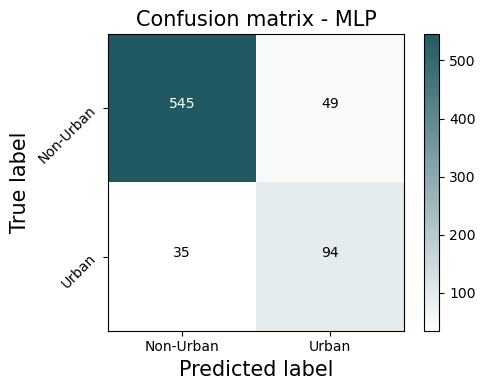

In [51]:
preds_mlp = Estimators[4].predict(X_test_unmod)
cfmatrix_mlp = confusion_matrix(y_test, preds_mlp)

fig, ax = plt.subplots(1,1, figsize=(5,4))

im = ax.imshow(cfmatrix_mlp, interpolation='nearest', cmap=mycmap)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=.2)
plt.colorbar(im, cax=cax) #, ticks=[-1,-0.5,0,0.5,1]
ax.set_title(f'Confusion matrix - MLP',fontsize=15)
tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticks(tick_marks)
ax.set_yticklabels(classes, rotation=45)
    
fmt = 'd'
thresh = cfmatrix_mlp.max() / 2.

for i, j in itertools.product(range(cfmatrix_mlp.shape[0]), range(cfmatrix_mlp.shape[1])):
    ax.text(j, i, format(cfmatrix_mlp[i, j], fmt), horizontalalignment="center", color="white" if cfmatrix_mlp[i, j] > thresh else "black")

ax.set_ylabel('True label',fontsize=15)
ax.set_xlabel('Predicted label',fontsize=15)
    
plt.tight_layout()
plt.show()

Κλείνοντας, εάν κανείς ήθελε να αναζητήσει καλύτερες εναλλακτικές που δεν παρουσιάστηκαν στην παρούσα ανάλυση, μια από αυτές θα μπορούσε να είναι ένα CNN ή ένα νευρωνικό δίκτυο τύπου LSTM. Ένα LSTM οποίο μπορεί να επεξεργάζεται ως input χαρακτηριστικά σε μορφή ακολουθιών με διαφορετικά μήκη, οι οποίες στην περίπτωση της αναγνώρισης εικόνας θα μπορούσαν να αντιστοιχούν στη διαφορετική ευκρίνεια των pixels στα «ουσιώδη» σημεία της εκάστοτε εικόνας (για παράδειγμα, καλύτερη διαμέριση γύρω από αντικείμενα), σε σχέση με τα λιγότερο ουσιώδη σημεία (για παράδειγμα, λιγότερο καλή διαμέριση σε φόντο όπως ο ουρανός). Από την άλλη, τα CNN χρησιμοποιούνται κατ΄ εξοχήν στην ανάλυση εικόνας, αφού είναι φτιαγμένα για αναγνώριση μοτίβων.